In [2]:
!pip install pyLDAvis
!pip install pyLDAvis.gensim
!pip install logging
!pip install wordcloud

!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm


/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached funcy-1.17-py2.py3-none-any.whl (33 kB)
  Using cached gensim-4.1.2-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (24.1 MB)
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/si

In [1]:
#[to do] talk to team about removing this

# import nltk
# from nltk.sentiment import SentimentIntensityAnalyzer

# # Word lists and lexicons in nltk: https://www.nltk.org/howto/corpus.html#word-lists-and-lexicons
# nltk.download('vader_lexicon')
# sia = SentimentIntensityAnalyzer()
# sia.polarity_scores("This is a really great weather!")

# # Output:
# # [nltk_data] Downloading package vader_lexicon to /root/nltk_data...
# # [nltk_data]   Package vader_lexicon is already up-to-date!
# # {'compound': 0.6893, 'neg': 0.0, 'neu': 0.461, 'pos': 0.539}

In [14]:
import pandas as pd
import boto3

comprehend = boto3.client('comprehend', region_name='us-east-1')

df_weather = pd.read_csv ('final.csv')

df_weather.head()


,Unnamed: 0,Date,Count_Crashes,Count_Fatalities,text,Low,High,Precipitation,snow,snowdepth,windgust,windspeed,cloudcover,conditions,description
0,0,2016-01-01,0.0,0,none,3.5,19.8,0.00,0.0,7.06,40.3,9.1,0.009,Clear,Clear conditions throughout the day.
1,1,2016-01-02,0.0,0,none,4.6,23.5,0.00,0.0,7.02,33.3,7.7,0.623,Partially cloudy,Partly cloudy throughout the day.
2,2,2016-01-03,0.0,0,none,19.1,26.2,0.00,0.0,6.73,34.4,5.8,0.834,Partially cloudy,Partly cloudy throughout the day.
3,3,2016-01-04,1.0,1,none,18.2,30.0,0.00,0.0,6.48,28.9,7.9,0.823,Partially cloudy,Partly cloudy throughout the day.
4,4,2016-01-05,0.0,0,none,27.3,38.4,0.01,0.0,6.03,0.0,14.1,0.930,"Snow, Overcast",Cloudy skies throughout the day with morning r...


In [4]:
#[To do] talk to team about removing this
#InputFieldName = "text"
#OutputFieldName_prefix = "Sentiment"

#iterate over each row calling comprehend for each and taking the result and saving it back to the datafrom
#for index, row in df_weather.iterrows():
    #this calls the comprehend service for each item in our data frame
    #res = comprehend.detect_sentiment(Text=df_weather.loc[index, InputFieldName], LanguageCode='en')
    
    #save sentiment scores to existing dataframe
    #df_weather.loc[index,f'{OutputFieldName_prefix}_Overall'] = res['Sentiment']
    #df_weather.loc[index,f'{OutputFieldName_prefix}_Positive'] = res["SentimentScore"]["Positive"]
    #df_weather.loc[index,f'{OutputFieldName_prefix}_Negative'] = res["SentimentScore"]["Negative"]
    #df_weather.loc[index,f'{OutputFieldName_prefix}_Neutral'] = res["SentimentScore"]["Neutral"]
    #df_weather.loc[index,f'{OutputFieldName_prefix}_Mixed'] = res["SentimentScore"]["Mixed"]

In [5]:
#df_weather['sentiment_overall'] = 0.00
#df_weather['sentiment_neg'] = 0.00
#df_weather['sentiment_neu'] = 0.00
#df_weather['sentiment_pos'] = 0.00

#for row in df_weather.itertuples():
    #sentiment = sia.polarity_scores(row[1])
    #df_weather.loc[row[0], 'sentiment_overall'] = sentiment['compound']
    #df_weather.loc[row[0], 'sentiment_neg'] = sentiment['neg']
    #df_weather.loc[row[0], 'sentiment_neu'] = sentiment['neu']
    #df_weather.loc[row[0], 'sentiment_pos'] = sentiment['pos']

#df_weather.head()

#df_weather.to_csv('Team_Project/weatherdataset.csv', index=False)
#df_weather.head(100)

In [15]:
import sys
import re
import numpy as np
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

#[to do] discuss the stop words
stop_words.extend(['and', 'snow', 'mdt', 'salt', 'impact', 'valley', 'pm', 'effect', 'mph', 'lake', 'area', 'wasatch', 'advisory', 'front', 'wind', 'morning', 'condition', 'winter', 'mountain', 'weather','evening', 'expect', 'high', 'inch', 'travel', 'remain', 'tooele'])

# stop words advisories.csv - 4 topics : 'and', 'snow', 'mdt', 'salt', 'impact', 'valley', 'pm', 'effect', 'mph', 'lake', 'area', 'wasatch', 'advisory', 'front', 'wind', 'morning', 'condition', 'winter', 'mountain', 'weather','evening', 'expect', 'high', 'inch', 'travel', 'remain', 'tooele'
# stop words weather data 'day', 'cloudy', 'partly', 'afternoon', 'rain', 'clear', 'snow', 'sky', 'morning', 'later', 'condition', 'clearing', 'early', 'late', 'chance', 'become'
# stop words Dan data: temperature, pm
# stop: 'impact', 'snow', 'mph', 'salt', 'high', 'gust', 'mdt', 'weather', 'strong', 'wind', 'morning', 'possible', 'expect', 'valley', 'inch', 'lake', 'area', 'evening', 'heat', 'advisory', 'condition', 'accumulation', 'additional'
# Output:
# [nltk_data] Downloading package stopwords to /root/nltk_data...
# [nltk_data]   Package stopwords is already up-to-date!

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#[to do] Discuss removing - or changing.  This just remove retweets.  We've already cleaned out data in previous steps
# print(f'Total weather: {len(df_weather)}')
# df_originals = df_weather[~df_weather['text'].str.contains("RT @")]
# print(f'Original weather: {len(df_originals)}')

# # Output
# # Total weather: 1000
# # Original weather: 996

In [16]:
def sent_to_words(sentences):
    for sent in sentences:
        #[to do] are there other things we could add to this list?
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert each weather to a list of cleaned words and add to a master list
data = df_weather.text.values.tolist()

print(data)

#data_words = list(sent_to_words(data))
#for weather in data_words[:5]: # print the first :n weather word lists
#    print(weather)



['none', 'none', 'none', 'none', 'none', 'none', 'THE NATIONAL WEATHER SERVICE IN SALT LAKE CITY HAS ISSUED A DENSE FOG ADVISORY...WHICH IS IN EFFECT UNTIL 11 AM MST THIS MORNING. * AFFECTED AREA...THE SALT LAKE AND TOOELE VALLEYS. * VISIBILITIES...QUARTER MILE OR LESS. * TIMING...THROUGH MID MORNING. * IMPACTS...POOR VISIBILITIES WILL CREATE DIFFICULT DRIVING CONDITIONS THROUGH THE MORNING COMMUTE. MOTORISTS SHOULD ALSO USE CAUTION AS ROADWAYS MAY BE SLICK.', 'THE NATIONAL WEATHER SERVICE IN SALT LAKE CITY HAS ISSUED A WINTER WEATHER ADVISORY FOR SNOW...WHICH IS IN EFFECT UNTIL NOON MST FRIDAY. * AFFECTED AREA...THE WASATCH FRONT...TOOELE VALLEY...GREAT SALT LAKE DESERT AND MOUNTAINS...AND WEST CENTRAL UTAH. * SNOW ACCUMULATIONS...1 TO 4 INCHES WITH LOCALLY HIGHER AMOUNTS POSSIBLE. * TIMING...SNOW WILL INCREASE THIS EVENING AND CONTINUE OVERNIGHT THROUGH FRIDAY MORNING BEFORE TAPERING OFF.  * IMPACTS...ACCUMULATING SNOW WILL IMPACT TRAVEL ACROSS NORTHERN AND WESTERN UTAH OVERNIGHT THR

In [9]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [10]:
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    # remove stop words using list comprehension
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    # add bigrams and trigrams using list comprehension
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]

    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])    # Load spacy, but we don't need the parser or NER (named entity extraction) modules

    # perform lemmatization and another round of stopword removal to catch any that were created by the lemmatization process
    for sent in texts:
      doc = nlp(" ".join(sent)) 
      texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

      # remove stopwords once more after lemmatization
      texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    

    return texts_out

data_ready = process_words(data_words)  # processed Text Data!
for weather in data_ready[:5]:
    print(weather)

['service', 'city', 'issue', 'dense_fog', 'mst', 'affected', 'visibility', 'less', 'time', 'mid', 'poor', 'visibility', 'create', 'difficult', 'driving', 'commute', 'motorist', 'also', 'use', 'caution', 'roadway', 'slick']
['service', 'city', 'issue', 'noon', 'affect', 'great', 'desert', 'central', 'accumulation', 'locally', 'amount', 'possible', 'timing', 'increase', 'continue', 'overnight', 'tapering', 'accumulate', 'northern', 'western', 'overnight', 'include', 'commute', 'prepare', 'driving', 'plan', 'accordingly', 'include', 'allow', 'extra', 'time']
['service', 'city', 'issue', 'midnight', 'tonight', 'affect', 'great', 'desert', 'west', 'central', 'sevi', 'sanpete', 'accumulation', 'generally', 'locally', 'amount', 'possible', 'time', 'develop', 'pre', 'dawn', 'hour', 'bulk', 'commute', 'taper', 'mid', 'day', 'early', 'snowfall', 'likely', 'create', 'difficulty', 'commute', 'plan', 'extra', 'time', 'allow', 'extra', 'follow', 'distance']
['mst', 'affected', 'great', 'desert', 'we

In [11]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

for row in id2word.iteritems():
  print(row)

(0, 'affected')
(1, 'also')
(2, 'caution')
(3, 'city')
(4, 'commute')
(5, 'create')
(6, 'dense_fog')
(7, 'difficult')
(8, 'driving')
(9, 'issue')
(10, 'less')
(11, 'mid')
(12, 'motorist')
(13, 'mst')
(14, 'poor')
(15, 'roadway')
(16, 'service')
(17, 'slick')
(18, 'time')
(19, 'use')
(20, 'visibility')
(21, 'accordingly')
(22, 'accumulate')
(23, 'accumulation')
(24, 'affect')
(25, 'allow')
(26, 'amount')
(27, 'central')
(28, 'continue')
(29, 'desert')
(30, 'extra')
(31, 'great')
(32, 'include')
(33, 'increase')
(34, 'locally')
(35, 'noon')
(36, 'northern')
(37, 'overnight')
(38, 'plan')
(39, 'possible')
(40, 'prepare')
(41, 'tapering')
(42, 'timing')
(43, 'western')
(44, 'bulk')
(45, 'dawn')
(46, 'day')
(47, 'develop')
(48, 'difficulty')
(49, 'distance')
(50, 'early')
(51, 'follow')
(52, 'generally')
(53, 'hour')
(54, 'likely')
(55, 'midnight')
(56, 'pre')
(57, 'sanpete')
(58, 'sevi')
(59, 'snowfall')
(60, 'taper')
(61, 'tonight')
(62, 'west')
(63, 'bench')
(64, 'especially')
(65, 'sout

In [12]:
# Create Corpus: Term Document Frequency - makes list of pairs - shows # of times a word shows up in each weather
corpus = [id2word.doc2bow(text) for text in data_ready]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 2)],
 [(3, 1),
  (4, 1),
  (8, 1),
  (9, 1),
  (16, 1),
  (18, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 2),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1)],
 [(3, 1),
  (4, 2),
  (5, 1),
  (9, 1),
  (11, 1),
  (16, 1),
  (18, 2),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (29, 1),
  (30, 2),
  (31, 1),
  (34, 1),
  (38, 1),
  (39, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1)],
 [(0, 1),
  (5, 1),
  (11, 2),
  (13, 1),
  (18, 2),
  (23

In [13]:
# Change the number of topics in the LDA here
topics = 4

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, # This is the corpus we created above
                                        id2word=id2word, # This is the dictionary we created above
                                        num_topics=topics,
                                        random_state=12345,
                                        chunksize=100,
                                        passes=5,
                                        per_word_topics=True)

ldatopics = lda_model.show_topics(formatted=False)
pprint(lda_model.print_topics())

[(0,
  '0.086*"temperature" + 0.033*"freeze" + 0.027*"warning" + 0.025*"southern" + '
  '0.025*"northern" + 0.023*"low" + 0.023*"portion" + 0.022*"hard_freeze" + '
  '0.021*"night" + 0.017*"desert"'),
 (1,
  '0.039*"strong" + 0.029*"gust" + 0.025*"affect" + 0.021*"include" + '
  '0.021*"afternoon" + 0.018*"south" + 0.017*"city" + 0.016*"time" + '
  '0.015*"route" + 0.015*"increase"'),
 (2,
  '0.037*"additional" + 0.036*"accumulation" + 0.036*"commute" + '
  '0.035*"southern" + 0.030*"detail" + 0.028*"northern" + 0.027*"possible" + '
  '0.026*"heavy" + 0.025*"total" + 0.024*"hazardous"'),
 (3,
  '0.045*"rain" + 0.044*"change" + 0.042*"low" + 0.030*"less" + 0.030*"south" '
  '+ 0.026*"cause" + 0.025*"castle_country" + 0.024*"extra" + 0.023*"take" + '
  '0.023*"north"')]


In [14]:
df_fit = pd.DataFrame(columns=['topics', 'perplexity', 'coherence'])

for n in range(1,5):
    # Fit LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                          id2word=id2word, 
                                          num_topics=n, 
                                          random_state=12345,
                                          chunksize=100, 
                                          passes=5,
                                          per_word_topics=True)

    # Generate fit metrics
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
    # Add metrics to df_fit
    df_fit.loc[str(n - 3)] = [n, round(lda_model.log_perplexity(corpus), 3), round(coherence_model_lda.get_coherence(), 3)]

df_fit
# Visualize results


,topics,perplexity,coherence
-2,1.0,-5.846,0.370
-1,2.0,-5.763,0.410
0,3.0,-5.630,0.542
1,4.0,-5.662,0.436


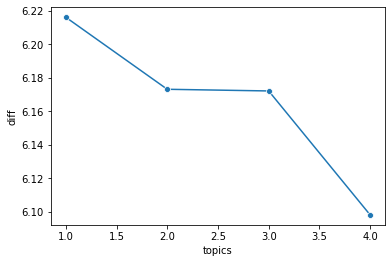

In [15]:
import seaborn as sns

df_fit['diff'] = abs(df_fit.coherence - df_fit.perplexity)
sns.lineplot(x='topics', y='diff', data=df_fit, ci=None, marker='o');

In [16]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                              id2word=id2word, 
                                              num_topics=4, 
                                              random_state=12345,
                                              chunksize=100, 
                                              passes=5,
                                              per_word_topics=True)

df_topics = df_weather.copy()

num_topics = len(lda_model.get_topics()) # store the number of topics from the last model
for col in range(num_topics): # generate a new column for each topic
  df_topics[f'topic_{col + 1}'] = 0.0

# Store the topic score and dominant topic
for i, words in enumerate(data_ready):
  doc = lda_model[id2word.doc2bow(words)] # generate a corpus for this document set of words

  for j, score in enumerate(doc[0]): # for each document in the corpus
    # Get the topic score and store it in the appropriate column
    df_topics.iat[i, (len(df_topics.columns) - ((num_topics) - score[0]))] = score[1]

df_topics.head(100)

,Date,text,topic_1,topic_2,topic_3,topic_4
0,JAN 7 2016,THE NATIONAL WEATHER SERVICE IN SALT LAKE CITY...,0.011144,0.465176,0.376165,0.147516
1,JAN 7 2016,THE NATIONAL WEATHER SERVICE IN SALT LAKE CITY...,0.000000,0.421707,0.562022,0.000000
2,JAN 14 2016,THE NATIONAL WEATHER SERVICE IN SALT LAKE CITY...,0.000000,0.391054,0.376223,0.226463
3,JAN 15 2016,...WINTER WEATHER ADVISORY REMAINS IN EFFECT U...,0.000000,0.253797,0.559158,0.179684
4,JAN 19 2016,...DENSE FOG ADVISORY IN EFFECT UNTIL 9 AM MST...,0.000000,0.328744,0.527015,0.137374
...,...,...,...,...,...,...
95,Jun 15 2019,...FLOOD WATCH IN EFFECT FROM 9 PM MDT THIS EV...,0.968916,0.010444,0.010550,0.010090
96,Jun 16 2019,...FLOOD WATCH REMAINS IN EFFECT THROUGH MONDA...,0.966430,0.011343,0.011264,0.010963
97,Jul 22 2019,...HEAT ADVISORY REMAINS IN EFFECT FROM NOON T...,0.208275,0.775025,0.000000,0.000000
98,Jul 23 2019,...HEAT ADVISORY REMAINS IN EFFECT UNTIL MIDNI...,0.179149,0.803050,0.000000,0.000000


In [17]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

# Create the output DataFrame
df_representative_weather = pd.DataFrame(columns=df_topics.columns)

# Iterate through each topic
for n in range(1, num_topics + 1):
  # Copy the row from the original df with the highest topic score into the new df
  df_representative_weather.loc['topic_' + str(n)] = df_topics.loc[df_topics['topic_' + str(n)].idxmax()]

df_representative_weather

,Date,text,topic_1,topic_2,topic_3,topic_4
topic_1,Aug 14 2020,...EXCESSIVE HEAT WARNING IN EFFECT FROM NOON SUNDAY TO MIDNIGHT MDT WEDNESDAY NIGHT... * WHAT....,0.97804,0.000000,0.000000,0.000000
topic_2,May 24 2017,...HIGH WIND WARNING IN EFFECT UNTIL 9 PM MDT THIS EVENING... The National Weather Service in S...,0.00000,0.985392,0.000000,0.000000
topic_3,Apr 9 2019,...WINTER WEATHER ADVISORY IN EFFECT FROM 4 AM WEDNESDAY TO 10 AM MDT THURSDAY... * WHAT...Snow...,0.00000,0.000000,0.979199,0.000000
topic_4,Jul 7 2017,...HEAT ADVISORY REMAINS IN EFFECT UNTIL 10 PM MDT SATURDAY... * AFFECTED AREA...The downtown a...,0.00000,0.000000,0.000000,0.982181


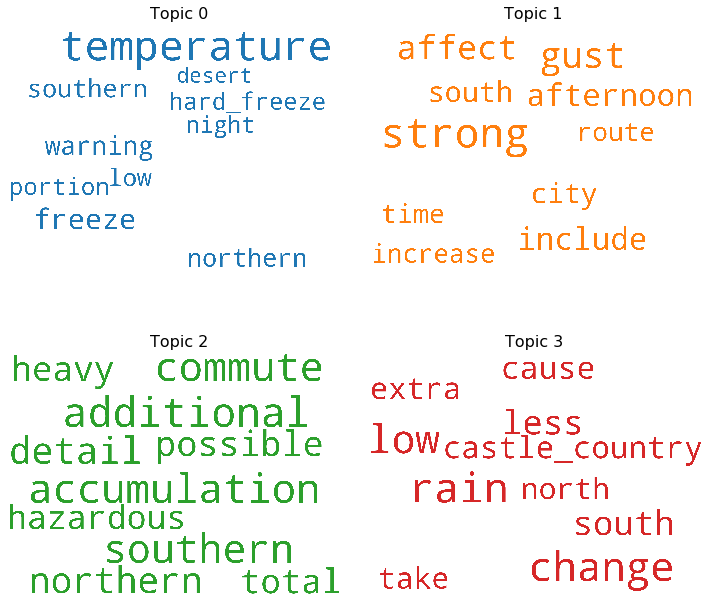

In [18]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    try:
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
      plt.gca().axis('off')
    except:
      continue


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

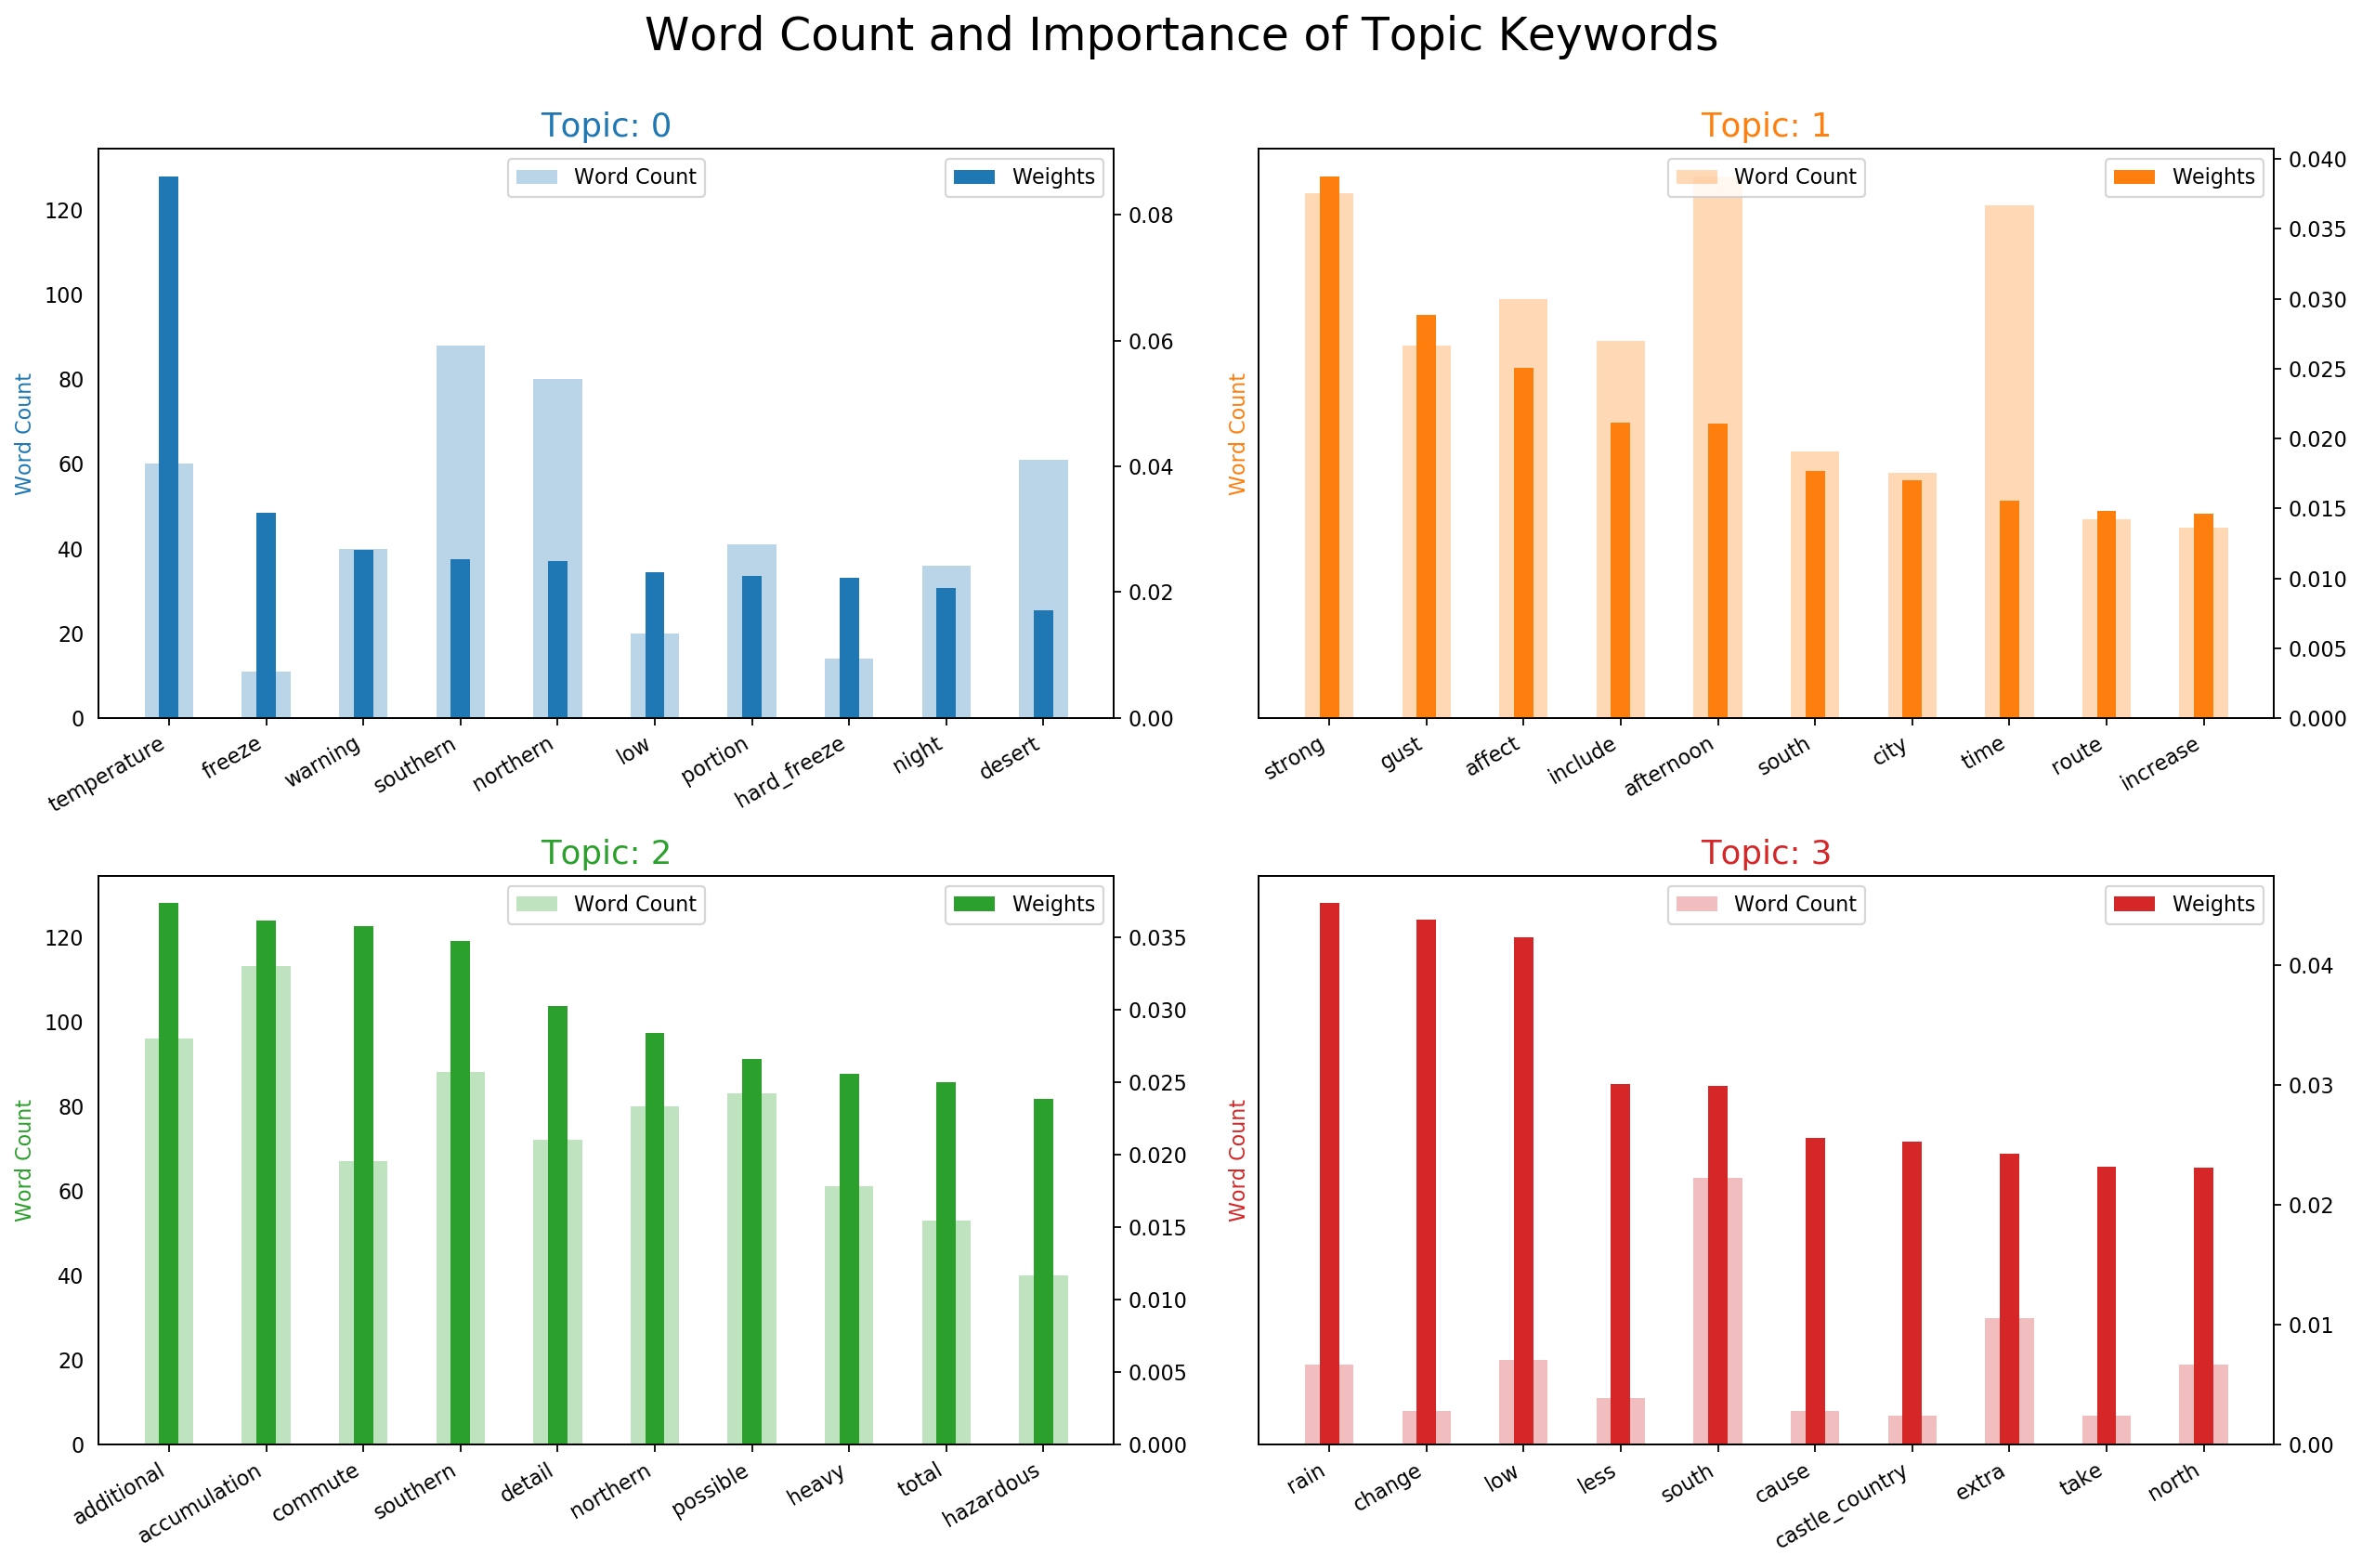

In [19]:
 # Bar chart of word counts for each topic
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    # ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper center'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [20]:
 # Get topic weights and dominant topics
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 209 samples in 0.000s...
[t-SNE] Computed neighbors for 209 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 209 / 209
[t-SNE] Mean sigma: 0.023732
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.737869
[t-SNE] KL divergence after 800 iterations: 0.134217


Loading BokehJS ...

In [21]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.109566 -0.133216       1        1  42.437593
2      0.234132 -0.062583       2        1  35.592802
0     -0.003633  0.202345       3        1  14.587390
3     -0.120932 -0.006547       4        1   7.382215, topic_info=             Term       Freq      Total Category  logprob  loglift
285   temperature  80.000000  80.000000  Default  30.0000  30.0000
4         commute  80.000000  80.000000  Default  29.0000  29.0000
331           low  41.000000  41.000000  Default  28.0000  28.0000
98          south  68.000000  68.000000  Default  27.0000  27.0000
23   accumulation  82.000000  82.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
188         gusty   3.712237  31.054977   Topic4  -4.8218   0.4820
101     afternoon   4.376083  86.124064   Topic4  -4.6573  -0.3735
18           time   4.008177  89.920656   Topic4  -4.7451  -0.5045
376          heat   2.889553  25.978675   Topic4  -5.0723   0.4099
31          great   2.928473  98.092745   Topic4  -5.0590  -0.9053

[232 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
23        2  0.972358  accumulation
23        4  0.012154  accumulation
95        1  0.011169    additional
95        2  0.927038    additional
95        3  0.067015    additional
...     ...       ...           ...
62        1  0.923936          west
62        2  0.032998          west
62        4  0.032998          west
43        1  0.984954       western
302       4  0.417240           wet

[333 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])